In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import harmonypy as hm


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sns.set_style("ticks")

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.8


In [3]:
# Step 1: Read the two 10x datasets
adata1 = sc.read_h5ad("/home/julia/data/RPE_MEl_resubmission/RPE_MELANO_eye_with_annotation_with_MELANO.h5ad")
adata2 = sc.read_h5ad("MC_just_qc.h5ad")

# Step 2: Annotate batches
# Add batch labels to identify the origin of each dataset
adata1.obs['batch'] = 'RPE'
adata2.obs['batch'] = 'MC'

In [4]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt"], inplace=True, log1p=True
)

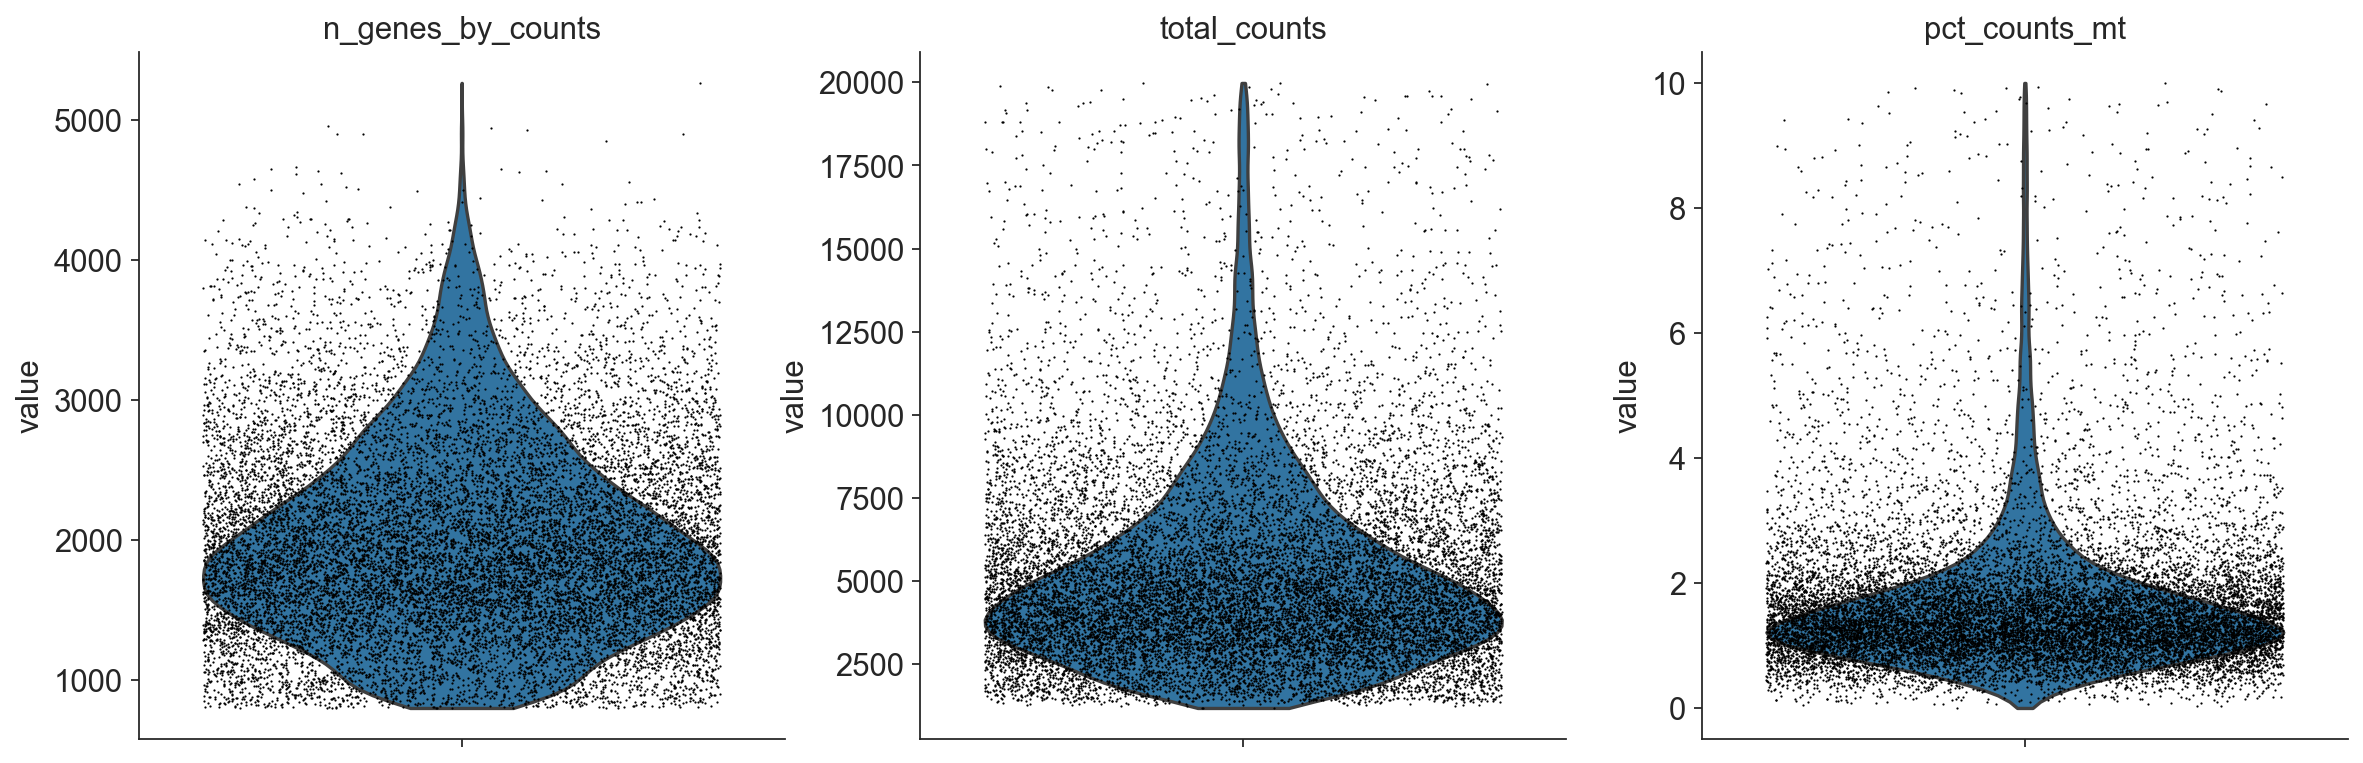

In [5]:
sc.pl.violin(
    adata1,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

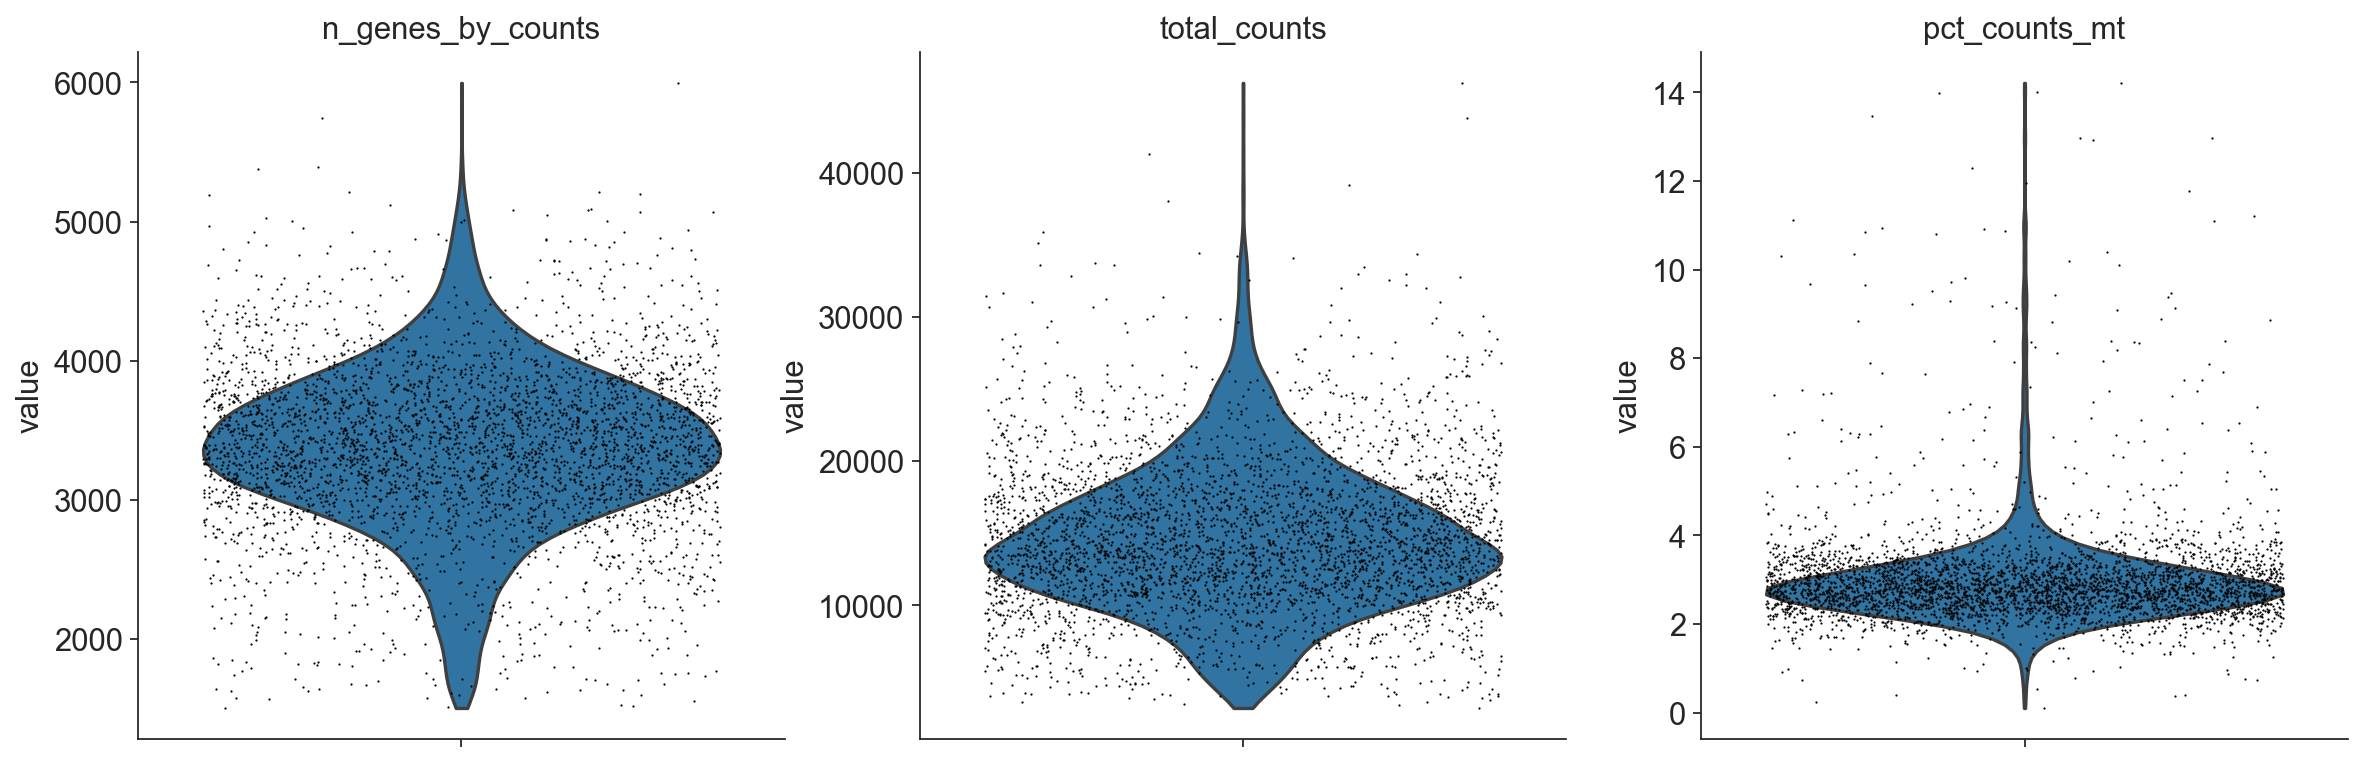

In [6]:
sc.pl.violin(
    adata2,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [7]:
adata1 = adata1[adata1.obs.n_genes_by_counts > 1000, :]
adata1 = adata1[adata1.obs.n_genes_by_counts < 4000, :]
adata1 = adata1[adata1.obs.total_counts <15000, :]
#adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

In [8]:
adata2 = adata2[adata2.obs.n_genes_by_counts > 1000, :]
adata2 = adata2[adata2.obs.n_genes_by_counts < 5000, :]
adata2 = adata2[adata2.obs.total_counts <30000, :]
adata2 = adata2[adata2.obs.total_counts >800, :]
adata2 = adata2[adata2.obs.pct_counts_mt < 6, :].copy()

Running Scrublet
filtered out 787 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:00:21)


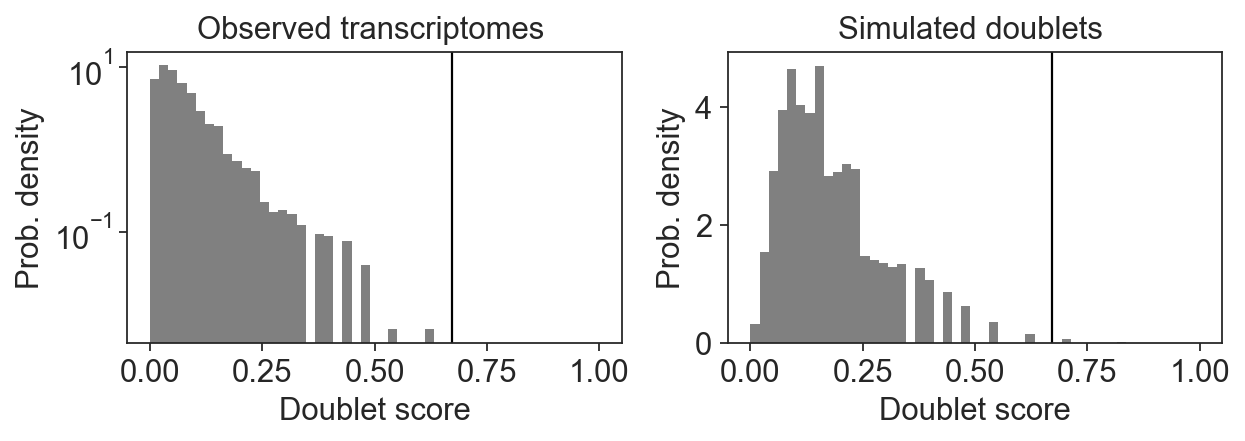

In [9]:
sc.external.pp.scrublet(adata1)
sc.external.pl.scrublet_score_distribution(adata1)
adata1 = adata1[adata1.obs['doublet_score'] < 0.25]

Running Scrublet
filtered out 133 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:04)


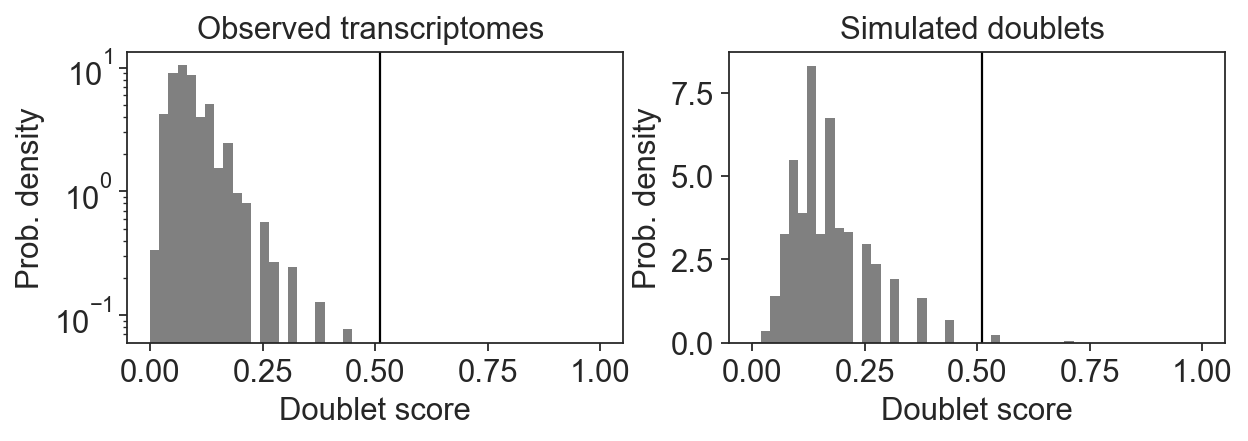

In [10]:
sc.external.pp.scrublet(adata2)
sc.external.pl.scrublet_score_distribution(adata2)
adata2 = adata2[adata2.obs['doublet_score'] < 0.3]

In [11]:
adata2.obs['cell_type']='MC'

/tmp/ipykernel_22255/356509295.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['cell_type']='MC'


In [12]:
adata2.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,batch,cell_type
AAACCTGAGGATGTAT-1,2498,2498,8047.0,185.0,2.298993,0.065279,False,MC,MC
AAACCTGCAACACCTA-1,3909,3907,16895.0,465.0,2.752294,0.047112,False,MC,MC
AAACCTGCATTCTCAT-1,3120,3119,12261.0,285.0,2.324443,0.033499,False,MC,MC
AAACCTGGTATCACCA-1,3441,3441,13195.0,345.0,2.614627,0.084862,False,MC,MC
AAACGGGAGTGGACGT-1,3212,3211,12853.0,541.0,4.209134,0.043165,False,MC,MC
...,...,...,...,...,...,...,...,...,...
TTTGTCACACTGTGTA-1,4087,4087,19033.0,433.0,2.274996,0.222506,False,MC,MC
TTTGTCAGTGGCCCTA-1,3702,3702,19736.0,569.0,2.883056,0.084862,False,MC,MC
TTTGTCATCACGCATA-1,3680,3680,17062.0,562.0,3.293869,0.182796,False,MC,MC
TTTGTCATCAGGCAAG-1,3524,3524,16004.0,494.0,3.086728,0.142361,False,MC,MC


In [13]:
sc.pp.filter_cells(adata1, min_genes=200)
sc.pp.filter_genes(adata1, min_cells=10)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


filtered out 3026 genes that are detected in less than 10 cells


In [14]:
sc.pp.filter_cells(adata2, min_genes=200)
sc.pp.filter_genes(adata2, min_cells=10)

filtered out 1865 genes that are detected in less than 10 cells


In [15]:
# Step 3: Merge the datasets
# Concatenate the datasets into a single AnnData object
adata_combined = adata1.concatenate(
    adata2,
    batch_key="batch",  # Creates a new "batch" column if not already present
    batch_categories=["RPE", "MC"],
    join='outer')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [16]:
adata_combined

AnnData object with n_obs × n_vars = 18501 × 17114
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'cells', 'cell_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt'
    var: 'gene_ids-MC', 'n_cells-MC', 'mt-MC', 'n_cells_by_counts-MC', 'mean_counts-MC', 'pct_dropout_by_counts-MC', 'total_counts-MC', 'feature_types-MC', 'gene_ids-RPE', 'n_cells-RPE', 'mt-RPE', 'n_cells_by_counts-RPE', 'mean_counts-RPE', 'pct_dropout_by_counts-RPE', 'total_counts-RPE', 'log1p_mean_counts-RPE', 'log1p_total_counts-RPE'
    layers: 'counts'

In [17]:
adata_combined.var=adata_combined.var.drop(columns = 
[ 'gene_ids-MC', 'n_cells-MC', 'mt-MC', 'n_cells_by_counts-MC', 'mean_counts-MC', 'pct_dropout_by_counts-MC', 'total_counts-MC', 'feature_types-MC', 'gene_ids-RPE', 'n_cells-RPE', 'mt-RPE', 'n_cells_by_counts-RPE', 'mean_counts-RPE', 'pct_dropout_by_counts-RPE', 'total_counts-RPE', 'log1p_mean_counts-RPE', 'log1p_total_counts-RPE'
                                   
                                   ], axis = 1) 

In [18]:
sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)
sc.pp.highly_variable_genes(adata_combined, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_combined.raw = adata_combined
sc.pp.scale(adata_combined, max_value=10)

sc.tl.pca(adata_combined, svd_solver='arpack', n_comps = 100)
sce.pp.harmony_integrate(adata_combined, 'batch', max_iter_harmony=10, basis="X_pca")

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:17)


2025-01-14 18:03:15,251 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-01-14 18:03:34,285 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-01-14 18:03:34,517 - harmonypy - INFO - Iteration 1 of 10
2025-01-14 18:03:43,500 - harmonypy - INFO - Iteration 2 of 10
2025-01-14 18:03:51,521 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:13)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:27)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


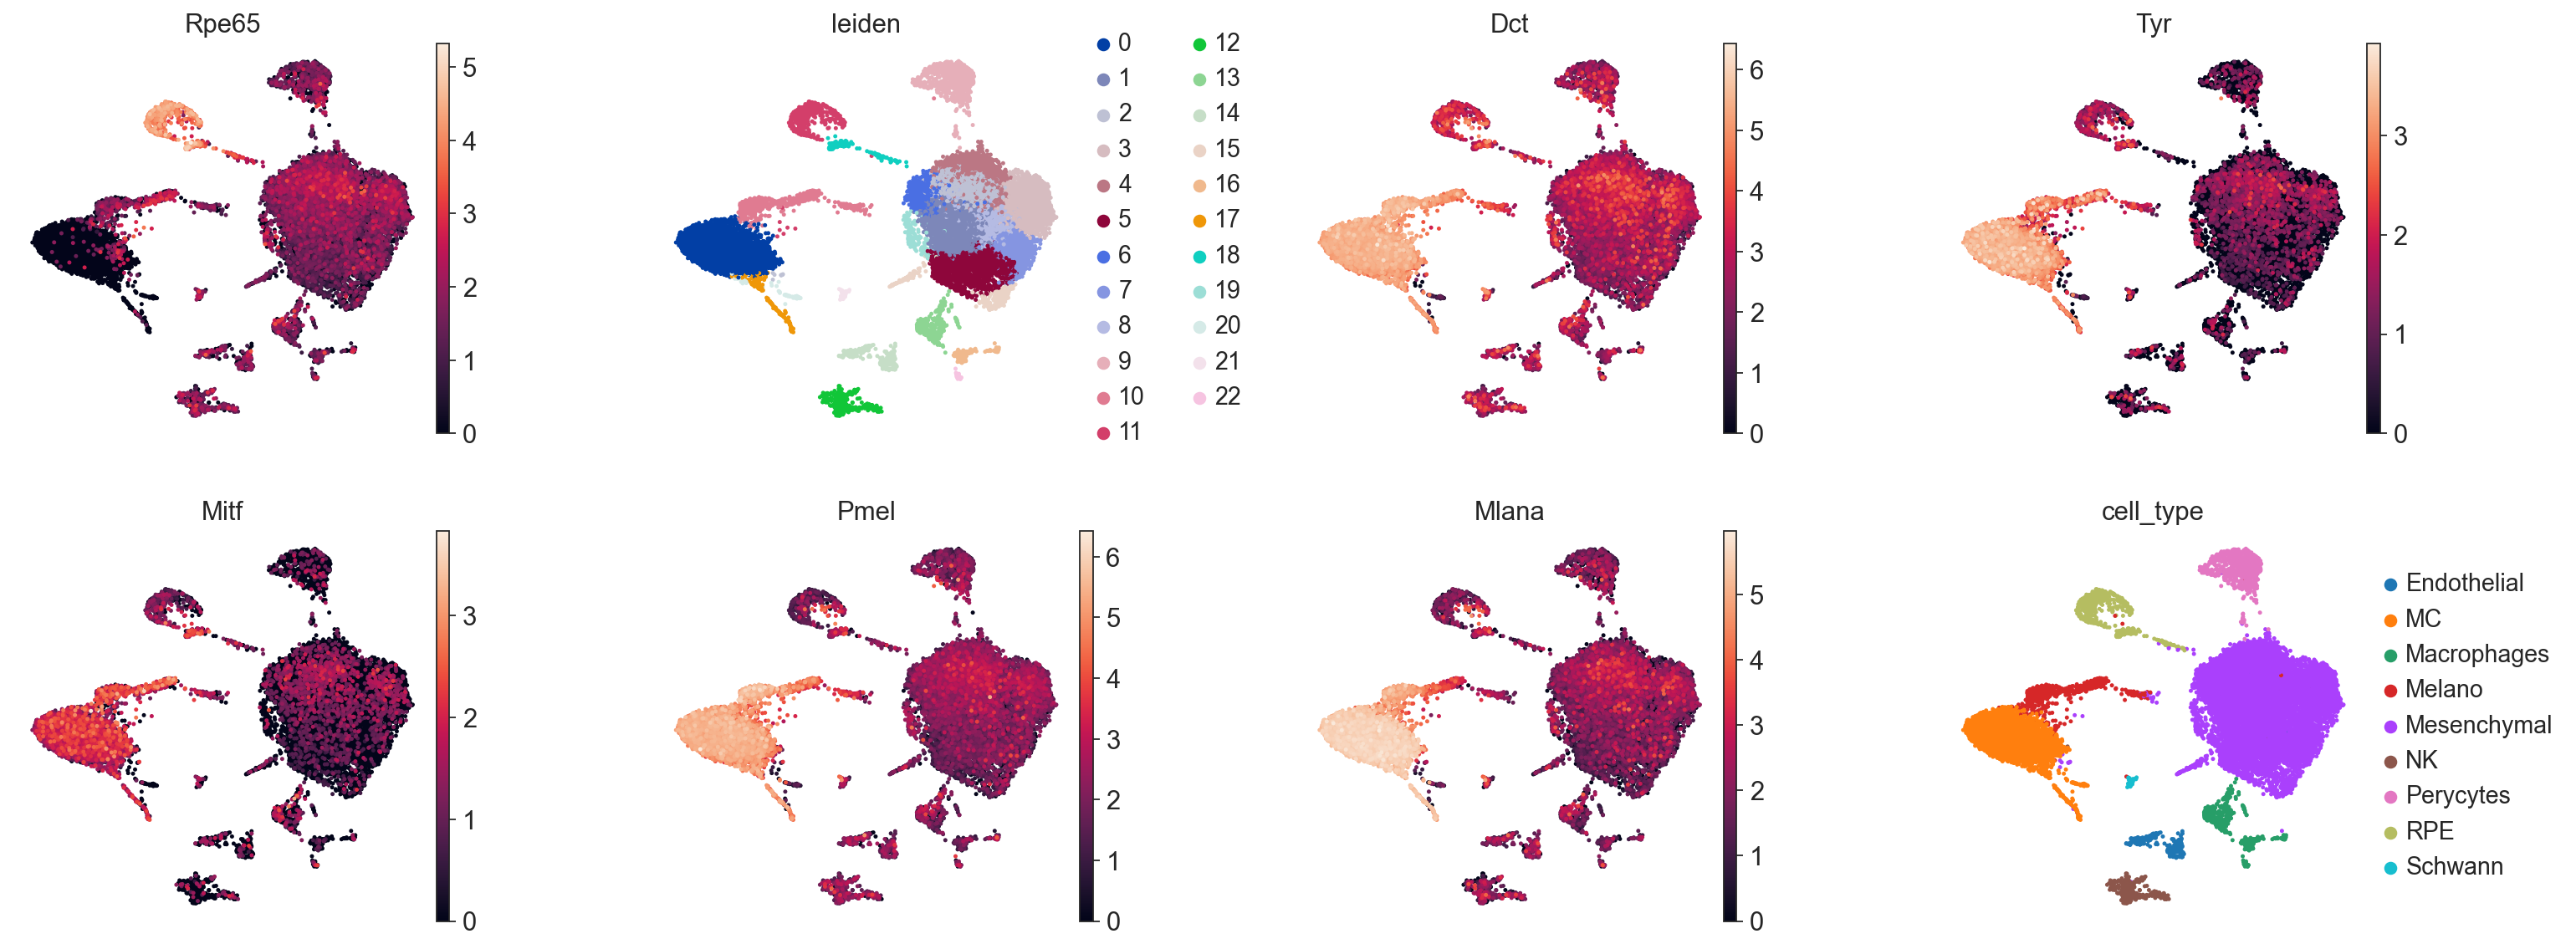

In [19]:
adata_combined1=adata_combined.copy()
sc.pp.neighbors(adata_combined1, n_neighbors=35, n_pcs = 35, use_rep="X_pca_harmony")

#sce.pp.harmony_integrate(adata_combined, 'run', max_iter_harmony=20, basis="X_pca")
#sc.pp.neighbors(adata_combined, n_neighbors=40, n_pcs = 30, use_rep="X_pca_harmony")

sc.tl.leiden(adata_combined1)
sc.tl.umap(adata_combined1)

sc.pl.umap(adata_combined1, color=["Rpe65","leiden",  "Dct", "Tyr", "Mitf", "Pmel", "Mlana", 'cell_type'],
            wspace=0.4, frameon=False, size=20)

In [20]:
adata=adata_combined1.copy()

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


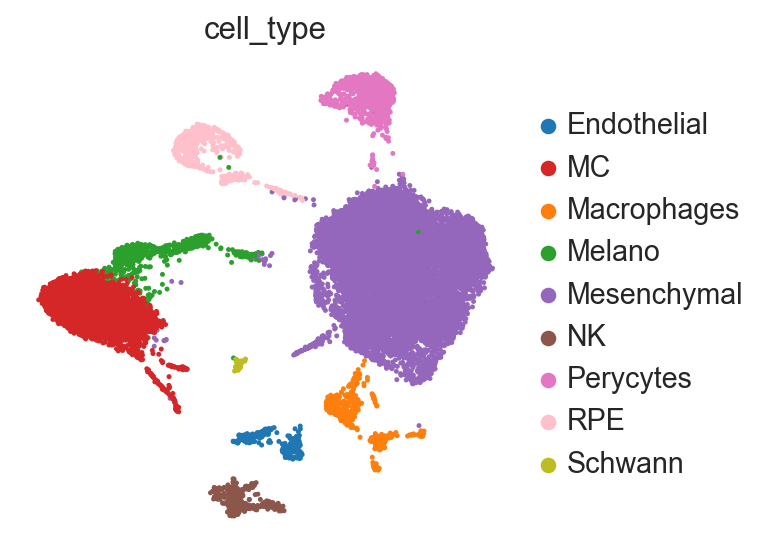

In [21]:
import scanpy as sc
import matplotlib.pyplot as plt

# Copy the data
adata = adata_combined1.copy()

# Define a custom color palette
custom_colors = {
    "Endothelial": "#1f77b4",
    "MC":   "#d62728",        # Use the same color as "PD4" here
    "Macrophages":  "#ff7f0e",
    "Melano":   "#2ca02c",
    "Mesenchymal": "#9467bd",
    "NK": "#8c564b",
    "Perycytes": "#e377c2",
    "RPE": "pink",
    "Schwann": "#bcbd22",
}

# Verify and apply the colors
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
adata.uns['cell_type_colors'] = [custom_colors[cat] for cat in adata.obs['cell_type'].cat.categories]

# Plot UMAP with consistent colors
sc.pl.umap(
    adata,
    color=["cell_type"],
    palette=adata.uns['cell_type_colors'],  # Apply the custom palette
    frameon=False,
    size=20,
)

# Save the updated plot as a PDF
#plt.savefig("MC_cs.pdf", format="pdf", bbox_inches="tight")


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


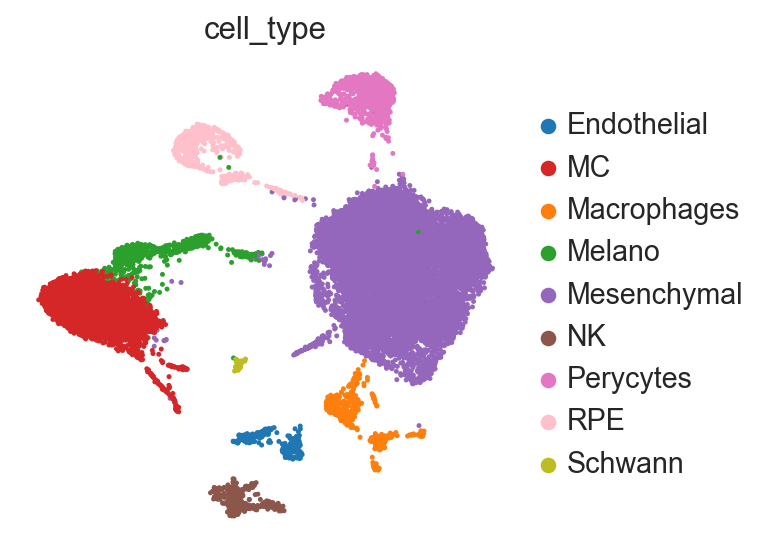

In [22]:
# Plot UMAP with consistent colors and save directly as PDF
sc.pl.umap(
    adata,
    color=["cell_type"],
    palette=adata.uns['cell_type_colors'],  # Apply the custom palette
    frameon=False,
    size=20,
    save="_MC_cs.pdf"  # Specify the filename directly here
)


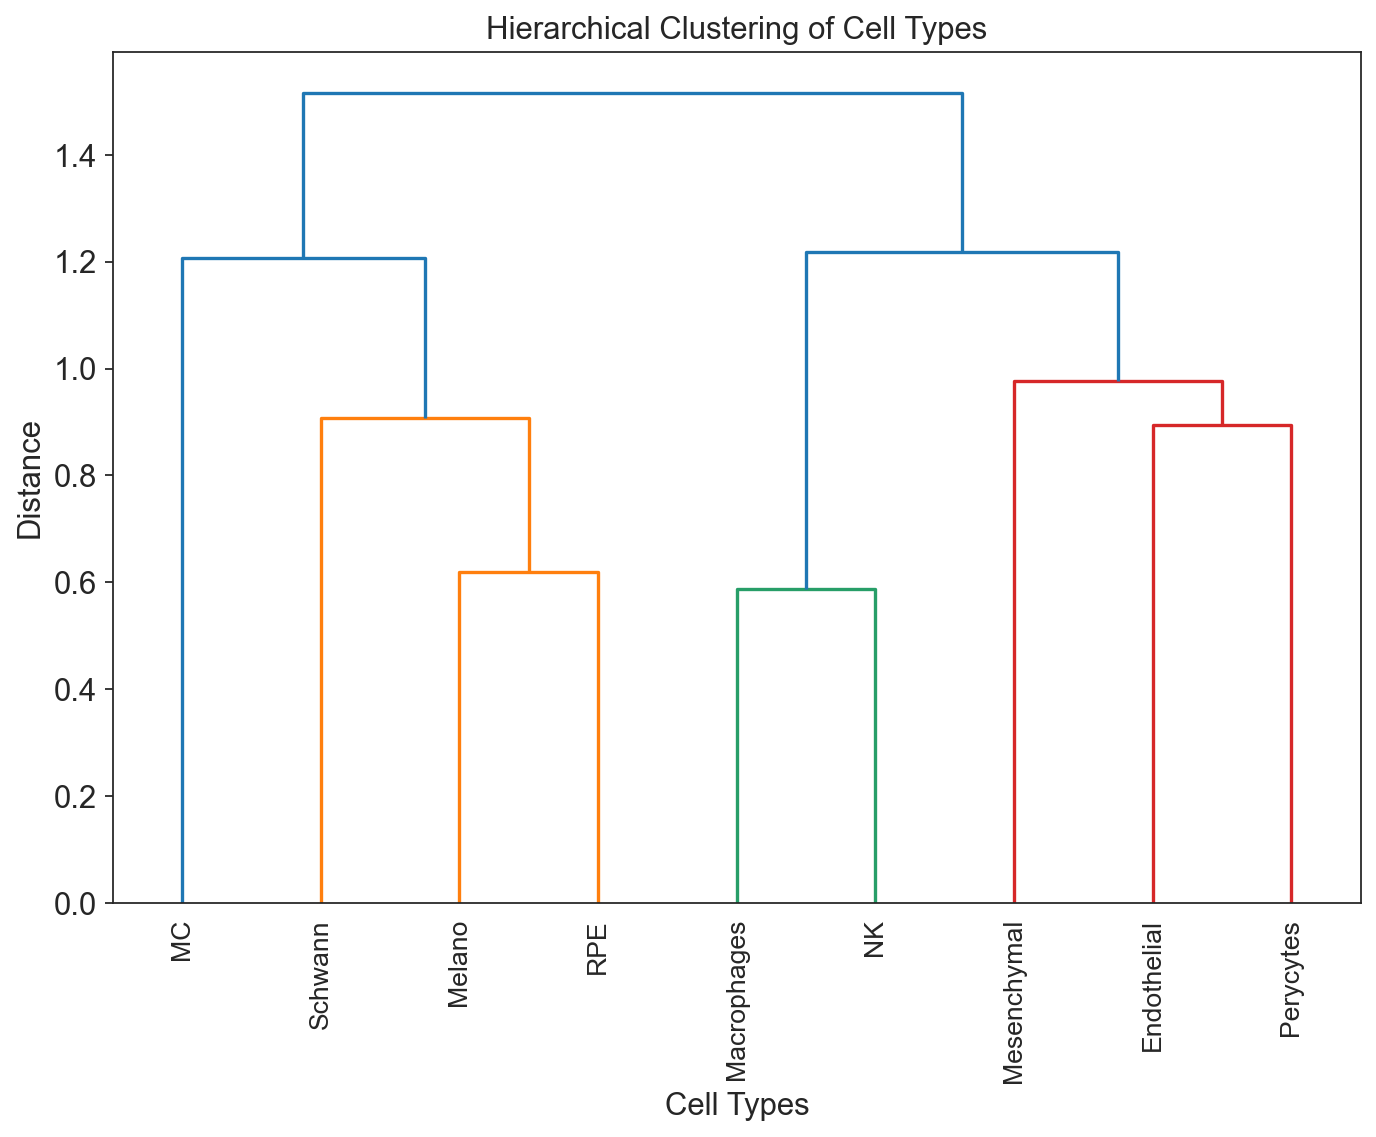

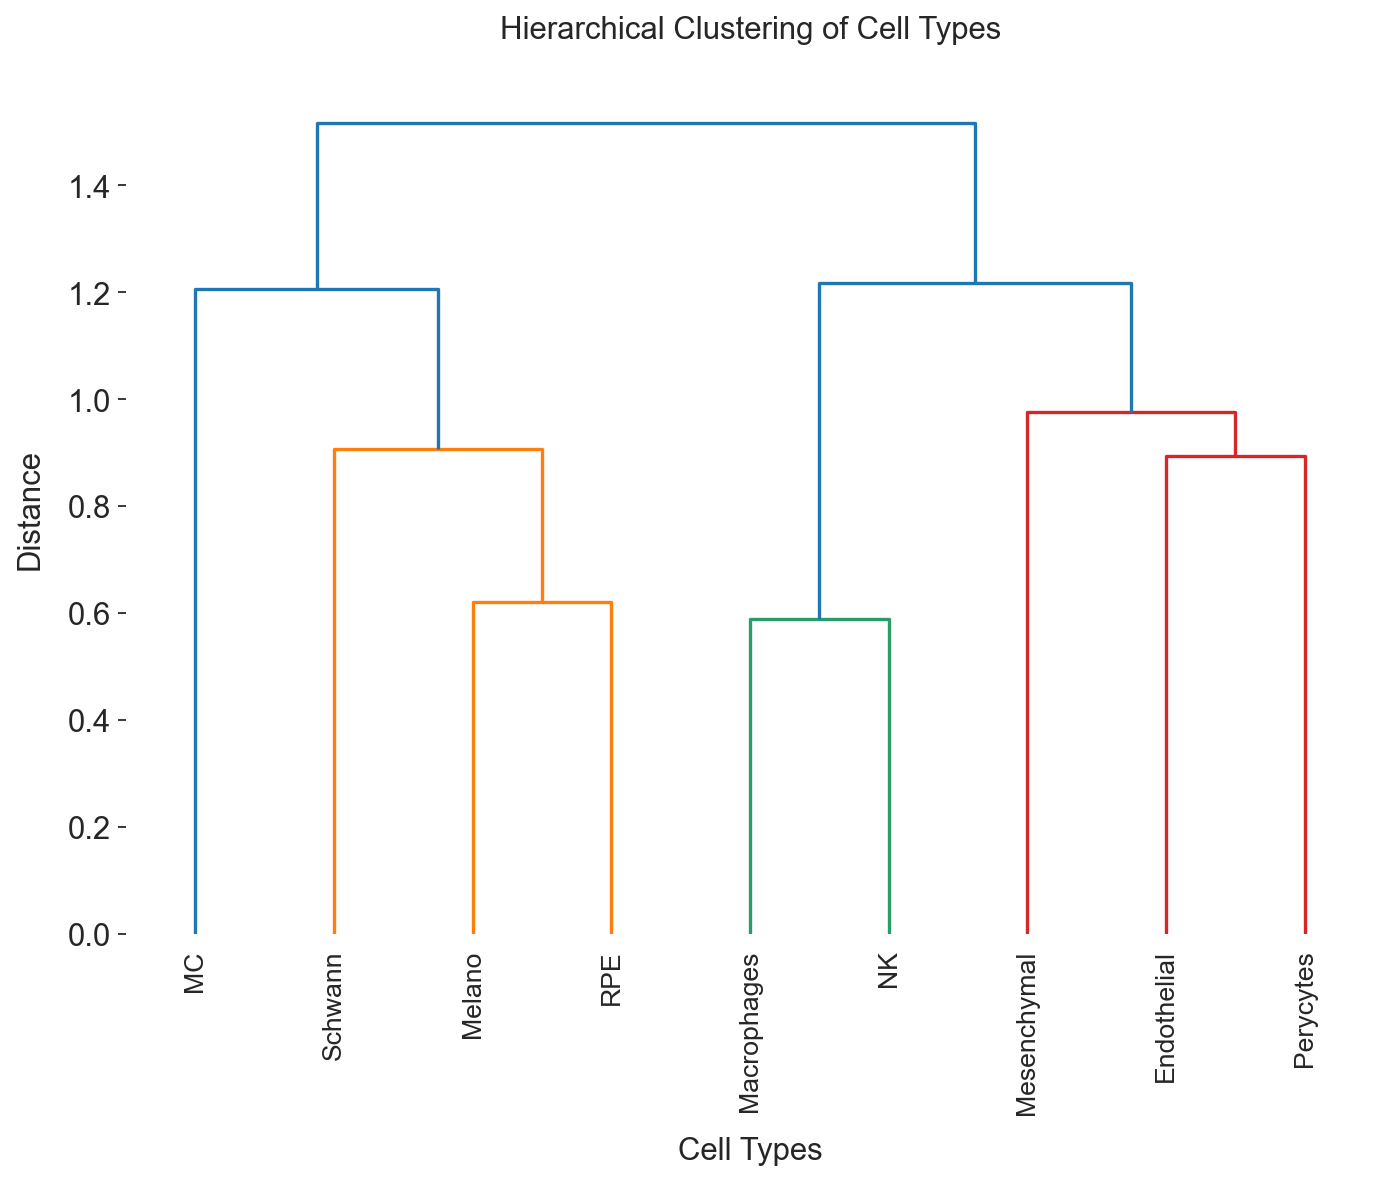

In [23]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Aggregate gene expression by cell type
adata_combined.obs['cell_type'] = adata_combined.obs['cell_type'].astype('category')  # Ensure 'cell_type' is categorical
mean_expression = adata_combined.to_df().groupby(adata_combined.obs['cell_type']).mean()  # Mean expression per cell type

from scipy.spatial.distance import pdist, squareform

# Compute pairwise distances (e.g., correlation distance)
distance_matrix = pdist(mean_expression, metric='correlation')  # Can use 'euclidean', 'cosine', etc.


# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')  # Use 'ward', 'average', or 'complete' linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix, 
    labels=mean_expression.index,  # Use cell type names as labels
    leaf_rotation=90, 
    leaf_font_size=12
)
plt.title("Hierarchical Clustering of Cell Types")
plt.xlabel("Cell Types")
plt.ylabel("Distance")
plt.show()


# Plot the dendrogram without a frame
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix, 
    labels=mean_expression.index,  # Use cell type names as labels
    leaf_rotation=90, 
    leaf_font_size=12
)
plt.title("Hierarchical Clustering of Cell Types", pad=20)
plt.xlabel("Cell Types", labelpad=10)
plt.ylabel("Distance", labelpad=10)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

In [24]:
adata_combined2=adata.copy()
import pandas as pd

# Inspect the unique cell types
print(adata_combined2.obs['cell_type'].unique())

# Define which clusters should be merged (e.g., all starting with "Melano")
melano_clusters = ['Melano', 'MC']  # Adjust based on the actual names in your data

# Create a new column with updated cell types
adata_combined2.obs['cell_type_merged'] = adata_combined2.obs['cell_type']

# Update the new column: merge Melano clusters
adata_combined2.obs['cell_type_merged'] = adata_combined2.obs['cell_type_merged'].replace(
    melano_clusters, 'Melano_combined'
)

# Verify the update
print(adata_combined2.obs['cell_type_merged'].unique())

['Melano', 'Perycytes', 'Mesenchymal', 'NK', 'Endothelial', 'Macrophages', 'RPE', 'Schwann', 'MC']
Categories (9, object): ['Endothelial', 'MC', 'Macrophages', 'Melano', ..., 'NK', 'Perycytes', 'RPE', 'Schwann']
['Melano_combined', 'Perycytes', 'Mesenchymal', 'NK', 'Endothelial', 'Macrophages', 'RPE', 'Schwann']
Categories (8, object): ['Endothelial', 'Macrophages', 'Melano_combined', 'Mesenchymal', 'NK', 'Perycytes', 'RPE', 'Schwann']


In [25]:
desired_order = [
    'Melano_combined',
    'RPE',
    'Mesenchymal',
    'Perycytes',
    'Macrophages',
    'NK',
    'Endothelial',
    'Schwann'
]

# Set the categorical order in the 'cell_type_merged' column
adata_combined2.obs['cell_type_merged'] = pd.Categorical(
    adata_combined2.obs['cell_type_merged'], 
    categories=desired_order, 
    ordered=True
)

# Verify the updated order
print(adata_combined2.obs['cell_type_merged'].cat.categories)


Index(['Melano_combined', 'RPE', 'Mesenchymal', 'Perycytes', 'Macrophages',
       'NK', 'Endothelial', 'Schwann'],
      dtype='object')


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


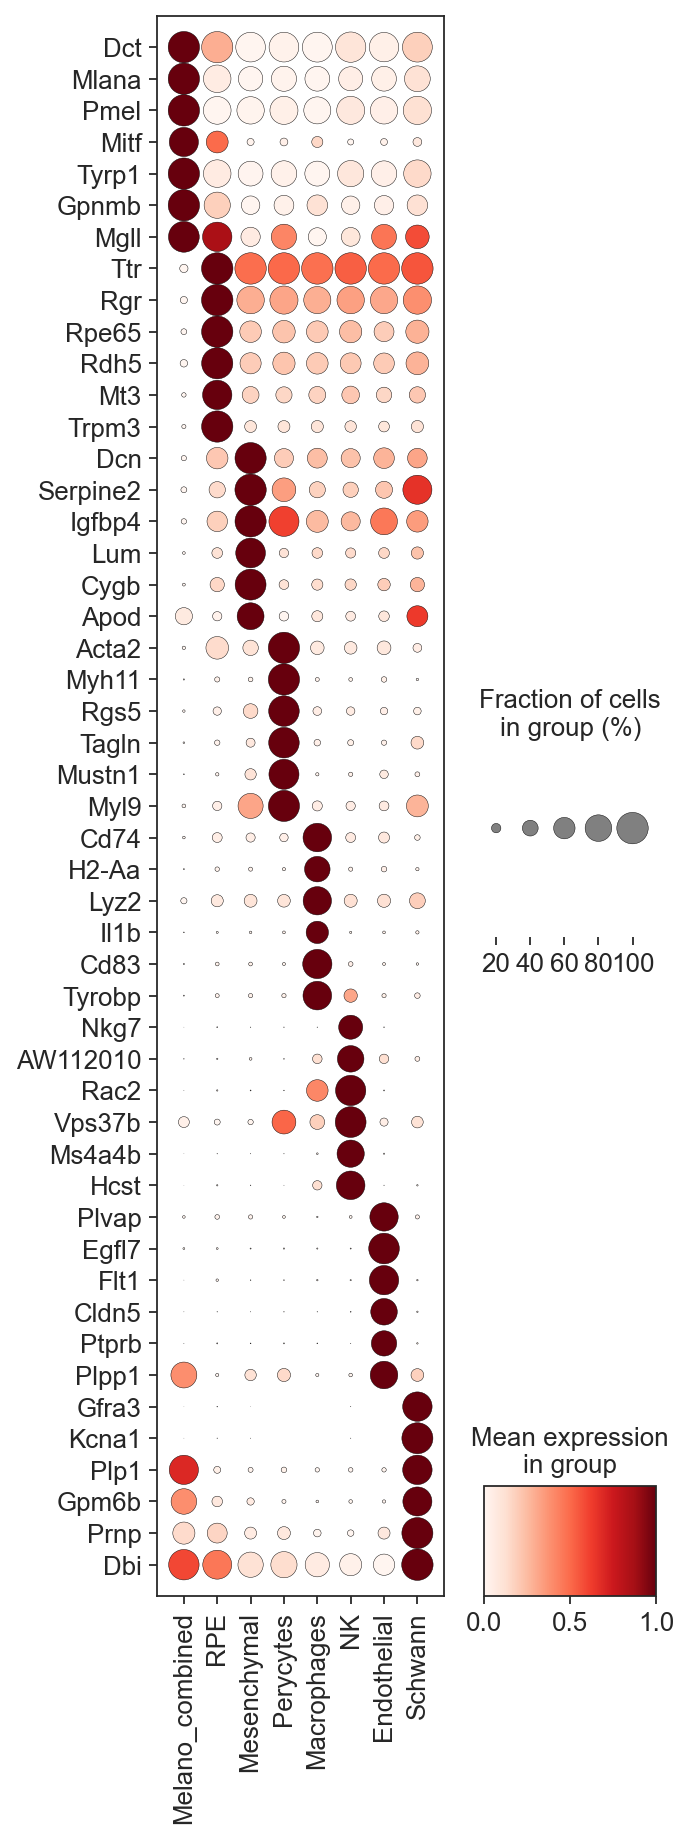

In [26]:
genes1=[
       "Dct", "Mlana", "Pmel",'Mitf','Tyrp1', 'Gpnmb','Mgll',
        "Ttr",   "Rgr","Rpe65", 'Rdh5','Mt3','Trpm3',
  "Dcn", "Serpine2", "Igfbp4", "Lum", "Cygb", "Apod",
           "Acta2", "Myh11", "Rgs5", "Tagln", "Mustn1", "Myl9",
             "Cd74", "H2-Aa",  "Lyz2", "Il1b",  "Cd83", "Tyrobp", 
              "Nkg7", "AW112010", "Rac2", "Vps37b", "Ms4a4b",  "Hcst",
             "Plvap", "Egfl7",  "Flt1",  "Cldn5", "Ptprb", "Plpp1",
            "Gfra3", "Kcna1",  "Plp1", "Gpm6b", "Prnp", "Dbi"]

sc.pl.dotplot(
    adata_combined2,
    var_names=genes1,  # Replace with your gene list
    groupby='cell_type_merged',
    standard_scale='var', 
    figsize=(4, 13),  # Adjust the figsize to accommodate the vertical layout
    swap_axes=True,  # This makes the plot vertical
    save='MC_cs_png_dot_6_vertical.png'
)


In [27]:
adata_hvg=adata.copy()

In [28]:
adata_hvg=adata_hvg.raw.to_adata()

# Cassiopea prep

In [29]:
import pandas as pd
import numpy as np
import scipy.sparse as sp

# Assuming 'adata' is your AnnData object and 'leiden' is the clustering annotation
# Create a DataFrame to store the results
cluster_gene_expression = {}

# Iterate over each cluster
for cluster in adata_hvg.obs['cell_type'].unique():
    # Subset the adata object to the current cluster
    cluster_data = adata_hvg[adata_hvg.obs['cell_type'] == cluster]
    
    # Ensure cluster_data.X is dense if it's sparse
    if sp.issparse(cluster_data.X):
        cluster_data_matrix = cluster_data.X.toarray()
    else:
        cluster_data_matrix = cluster_data.X
    
    # Calculate the fraction of cells expressing each gene
    fraction_expressing = (cluster_data_matrix > 0).sum(axis=0) / cluster_data.n_obs
    
    # Filter genes expressed in at least 10% of the cells
    genes_expressed = np.array(adata_hvg.var_names)[fraction_expressing >0.1]
    
    # Store the results in a dictionary
    cluster_gene_expression[cluster] = genes_expressed

# Convert the results into a readable format
cluster_gene_expression_df = pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in cluster_gene_expression.items()])
)

# Save the results to a CSV file
#cluster_gene_expression_df.to_csv("genes_expressed_in_clusters.csv", index=False)

#print("Genes expressed in at least 10% of cells for each cluster saved to 'genes_expressed_in_clusters.csv'.")


In [30]:
cluster_gene_expression_df

,Melano,Perycytes,Mesenchymal,NK,Endothelial,Macrophages,RPE,Schwann,MC
0,0610009B22Rik,0610009L18Rik,0610009B22Rik,0610010K14Rik,0610010K14Rik,0610010K14Rik,0610009B22Rik,0610009L18Rik,0610009B22Rik
1,0610009L18Rik,0610010K14Rik,0610009L18Rik,0610012G03Rik,0610012G03Rik,0610012G03Rik,0610009L18Rik,0610010K14Rik,0610009L18Rik
2,0610010K14Rik,0610012G03Rik,0610010K14Rik,1110004F10Rik,1110004F10Rik,0610030E20Rik,0610010K14Rik,0610012G03Rik,0610010F05Rik
3,0610012G03Rik,1110004F10Rik,0610012G03Rik,1110008P14Rik,1110008P14Rik,1110004F10Rik,0610012G03Rik,1110004F10Rik,0610010K14Rik
4,1110004F10Rik,1110008P14Rik,1110004F10Rik,1110038B12Rik,1110038B12Rik,1110008P14Rik,0610030E20Rik,1110008P14Rik,0610012G03Rik
...,...,...,...,...,...,...,...,...,...
7158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd2
7159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd3
7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd4
7161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd4l


In [31]:
with open('/home/julia/data/Scenic_database/Mouse/TF/allTFs_mm.txt', 'r') as file:
    list_tf = []
    for line in file.read().split('\n'):
            
                list_tf.append(line)
                
print(list_tf)

['Bcl6b', 'Zscan26', 'Mtf1', 'Klf9', 'Zic5', 'Zfp410', 'Zfp3', 'Zfp691', 'Zfp637', 'Egr3', 'Klf12', 'Bcl6', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Tfap2e', 'Arid3a', 'Arid5a', 'Ascl2', 'Tcf3', 'Bhlhe40', 'Myf6', 'Max', 'Mafk', 'Atf1', 'Jdp2', 'Mafb', 'Glis2', 'Plagl1', 'Osr2', 'Sp4', 'Klf7', 'Zbtb7b', 'Zic1', 'Egr1', 'Zfp281', 'Hic1', 'Zfp740', 'Osr1', 'Zbtb14', 'Zbtb12', 'Zscan4c', 'Zfp105', 'Zfp128', 'Zic2', 'Zic3', 'Zbtb3', 'E2f3', 'E2f2', 'Spi1', 'Elf3', 'Gabpa', 'Ehf', 'Spdef', 'Foxj3', 'Foxj1', 'Foxa2', 'Foxk1', 'Foxl1', 'Gata6', 'Gata3', 'Gata5', 'Gcm1', 'Six6', 'Nkx3-1', 'Hnf1a', 'Hoxa3', 'Irf9', 'Irf3', 'Irf4', 'Irf6', 'Irf5', 'Srf', 'Myb', 'Mybl1', 'Rxra', 'Hnf4a', 'Esrra', 'Nr2f2', 'Rara', 'Rfx4', 'Rfx7', 'Rfx3', 'Sp100', 'Gmeb1', 'Smad3', 'Tcf7', 'Hbp1', 'Cic', 'Bbx', 'Sox8', 'Tcf7l2', 'Sox17', 'Lef1', 'Sox30', 'Sox15', 'Sox5', 'Sox18', 'Sox12', 'Sox14', 'Tcf7l1', 'Sox21', 'Sox7', 'Sox11', 'Sry', 'Sox13', 'Sox4', 'Sox1', 'Eomes', 'Tbp', 'Cux1', 'Lhx2', 'Hoxb6', 'Hoxa10', 'Hoxa4', '

In [32]:
len(list_tf)

1861

In [33]:
# Convert the list of transcription factors to a set for faster lookups
set_tf = set(list_tf)

In [34]:
# Create a DataFrame with transcription factors as rows and clusters as columns
tf_df = pd.DataFrame(index=list_tf, columns=cluster_gene_expression_df.columns)

# Populate the DataFrame
for cluster in cluster_gene_expression_df.columns:
    # Check if each TF is present in the cluster's gene list
    cluster_genes = set(cluster_gene_expression_df[cluster].dropna())  # Drop NaN values
    tf_df[cluster] = [gene in cluster_genes for gene in list_tf]

# Convert boolean values to True/False explicitly if necessary
tf_df = tf_df.applymap(bool)

# Save the resulting DataFrame to a CSV file
#tf_df.to_csv("tf_intersection_clusters.csv")

#print("DataFrame with transcription factors as rows and clusters as columns saved to 'tf_intersection_clusters.csv'.")


In [35]:
tf_df

,Melano,Perycytes,Mesenchymal,NK,Endothelial,Macrophages,RPE,Schwann,MC
Bcl6b,False,False,False,False,True,False,False,False,False
Zscan26,True,False,False,False,True,False,True,False,True
Mtf1,False,False,False,False,False,False,True,False,True
Klf9,True,True,True,True,True,True,True,True,True
Zic5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
Zscan4b,False,False,False,False,False,False,False,False,False
Zscan4e,False,False,False,False,False,False,False,False,False
Zswim1,False,False,False,False,False,False,False,False,True
Zxdb,False,False,False,False,False,False,False,False,False


In [36]:
# Assuming 'tf_df' is the DataFrame with True/False values
# Convert True/False to 1/0
tf_df = tf_df.astype(int)
tf_df
# Save the resulting DataFrame to a CSV file
#tf_df.to_csv("tf_presence_as_binary.csv")

#print("DataFrame with 1/0 representation saved to 'tf_presence_as_binary.csv'.")

,Melano,Perycytes,Mesenchymal,NK,Endothelial,Macrophages,RPE,Schwann,MC
Bcl6b,0,0,0,0,1,0,0,0,0
Zscan26,1,0,0,0,1,0,1,0,1
Mtf1,0,0,0,0,0,0,1,0,1
Klf9,1,1,1,1,1,1,1,1,1
Zic5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Zscan4b,0,0,0,0,0,0,0,0,0
Zscan4e,0,0,0,0,0,0,0,0,0
Zswim1,0,0,0,0,0,0,0,0,1
Zxdb,0,0,0,0,0,0,0,0,0


In [37]:
# Assuming 'tf_df' is the DataFrame with 1/0 representation

# Filter rows where not all values are 0 or 1
filtered_tf_df = tf_df[(tf_df.sum(axis=1) != 0) & (tf_df.sum(axis=1) != tf_df.shape[1])]
filtered_tf_df
# Save the filtered DataFrame to a CSV file
#filtered_tf_df.to_csv("cassiopea_folders_24_12/filtered_tf_2000_hv.csv")

#print("Filtered DataFrame saved to 'filtered_tf_binary.csv'.")

,Melano,Perycytes,Mesenchymal,NK,Endothelial,Macrophages,RPE,Schwann,MC
Bcl6b,0,0,0,0,1,0,0,0,0
Zscan26,1,0,0,0,1,0,1,0,1
Mtf1,0,0,0,0,0,0,1,0,1
Zfp410,0,0,0,0,0,0,0,0,1
Zfp691,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
Zfp938,1,0,0,0,0,0,1,0,1
Zfp950,1,0,1,0,0,0,1,1,1
Zhx2,0,0,0,0,0,0,0,0,1
Zrsr1,0,0,0,0,0,0,1,0,0


In [38]:
filtered_tf_df.to_csv("MC_cs_cassiopea_dataframe.csv")

In [39]:
adata

AnnData object with n_obs × n_vars = 18501 × 17114
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'cells', 'cell_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [40]:
adata.write_h5ad('10_MC_cs_Final.h5ad')